## Computer Vision With Supervision, Inference, and Ultralytics Library

### Computer Vision Tasks

- Images - Detect and Annotate objects on image
- Video Analysis - Detect, track, annotate, and trace objects in videos
- Video Analysis - Keypoint Tracking

### Computer Vision Libraries

**Supervision** - It provides a seamless process for annotating predictions generated by various object detection and segmentation models.

**Inference** - It enables you to perform object detection, classification, instance segmentation and keypoint detection, and utilize foundation models like CLIP, Segment Anything, and YOLO-World, through a Python-native package.

**Ultralytics** - It creates and provides access to state of the art computer vision models.

### Usecases

- Autonomous Driving
- Monitoring Patient
- Survellience Camera
- Inventory Management

### Installation

```
pip install supervision
pip install inference
pip install ultralytics
```

### Model

**Yolo8n** is the nano version of the model Yolo8 model. It is faster and more lightweight, 
making it suitable for real-time or resource-constrained applications.

### Importing Packages

In [5]:
import cv2
import supervision as sv
from inference import get_model
from matplotlib import pyplot as plt

### Loading an image

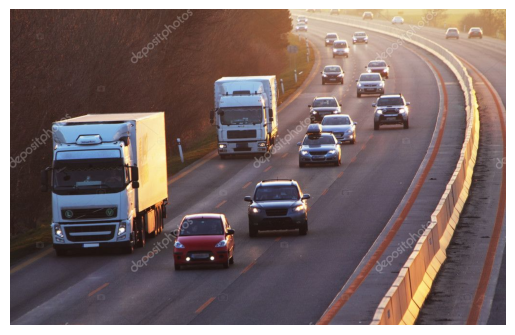

In [15]:
image = cv2.imread('car-trucks.jpg')
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(color_image)
plt.axis('off')
plt.show()

### Downloading Model and inference is performed

In [16]:

model = get_model(model_id="yolov8n-640")
results = model.infer(image)[0]

### Detections

In [17]:
detections = sv.Detections.from_inference(results)

### Labels from Detections

In [18]:
labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

### Annotation

In [19]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

### Annotating Custom Label to Images

In [20]:
annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

### Plotting

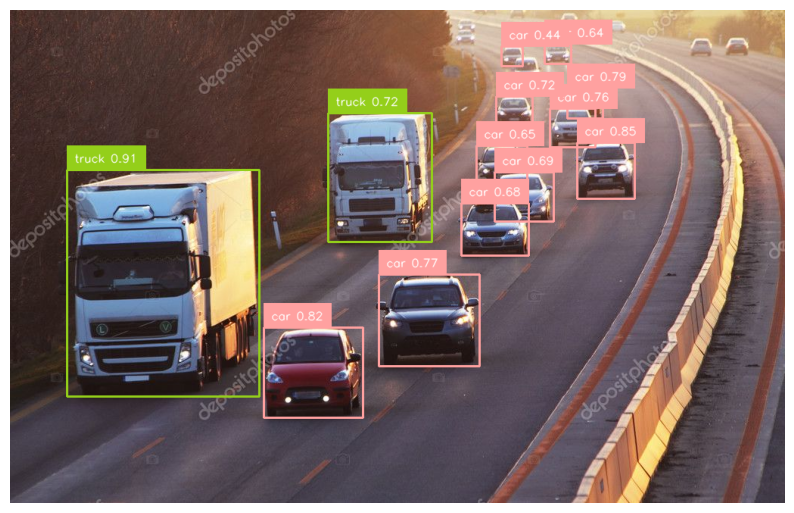

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Annotate Image with Segmentation

In [22]:
import cv2
import supervision as sv
from inference import get_model

model = get_model(model_id="yolov8n-seg-640")
image = cv2.imread('car-trucks.jpg')
results = model.infer(image)[0]
detections = sv.Detections.from_inference(results)

mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER_OF_MASS)

annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

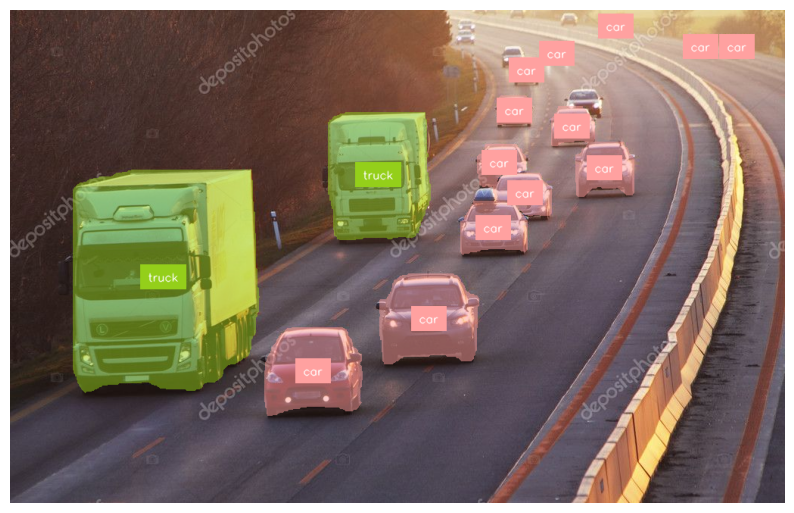

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Tracking Objects In Video

### Annotating objects in the video

In [ ]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    """
    It will process each frame of the video by obtaining model predictions and then annotating the frame based on these predictions.
    """
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    return box_annotator.annotate(frame.copy(), detections=detections)

sv.process_video(
    source_path="people-walking.mp4",
    target_path="result.mp4",
    callback=callback
)


0: 384x640 37 persons, 2 birds, 430.5ms
Speed: 10.7ms preprocess, 430.5ms inference, 2225.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 3 birds, 4.3ms
Speed: 1.6ms preprocess, 4.3ms inference, 14.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 3 birds, 4.8ms
Speed: 2.1ms preprocess, 4.8ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 3 birds, 5.7ms
Speed: 1.4ms preprocess, 5.7ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 4.4ms
Speed: 1.9ms preprocess, 4.4ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 2 birds, 4.2ms
Speed: 1.4ms preprocess, 4.2ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.3ms
Speed: 1.4ms preprocess, 4.3ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.2ms
Sp

### Track object using ByteTrack

**Each detected object is assigned a unique tracker ID, enabling the continuous following of the object's motion path across different frames.**

In [ ]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    """
    It will process each frame of the video by obtaining model predictions and then annotating the frame based on these predictions.
    """
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections=detections)
    return box_annotator.annotate(frame.copy(), detections=detections)

sv.process_video(
    source_path="people-walking.mp4",
    target_path="tracking-detected-objects.mp4",
    callback=callback
)


0: 384x640 37 persons, 2 birds, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 3 birds, 4.3ms
Speed: 1.3ms preprocess, 4.3ms inference, 14.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 3 birds, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 11.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 3 birds, 4.4ms
Speed: 1.4ms preprocess, 4.4ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 4.9ms
Speed: 1.5ms preprocess, 4.9ms inference, 14.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 2 birds, 6.0ms
Speed: 2.3ms preprocess, 6.0ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 5.9ms
Speed: 1.7ms preprocess, 5.9ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.6ms
Speed: 1.

### Label Annotator

Annotate Video with Tracking IDs

In [25]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {class_name}"
        for class_name, tracker_id
        in zip(detections.data["class_name"], detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    return label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)

sv.process_video(
    source_path="people-walking.mp4",
    target_path="annotate-tracked-object.mp4",
    callback=callback
)


0: 384x640 37 persons, 2 birds, 4.2ms
Speed: 1.4ms preprocess, 4.2ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 3 birds, 6.2ms
Speed: 2.0ms preprocess, 6.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 3 birds, 4.7ms
Speed: 1.7ms preprocess, 4.7ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 3 birds, 4.5ms
Speed: 1.6ms preprocess, 4.5ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 4.4ms
Speed: 1.4ms preprocess, 4.4ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 2 birds, 4.3ms
Speed: 1.4ms preprocess, 4.3ms inference, 14.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.2ms
Speed: 1.5ms preprocess, 4.2ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.7ms
Speed: 2.

### Trace Annotator

It involves overlaying the historical paths of the detected objects. This feature, powered by \
the sv.TraceAnnotator, allows for visualizing the trajectories of objects, helping in understanding \
the movement patterns and interactions between objects in the video.

In [10]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
tracker = sv.ByteTrack()
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
trace_annotator = sv.TraceAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {class_name}"
        for class_name, tracker_id
        in zip(detections.data["class_name"], detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    annotated_frame = label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)
    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="people-walking.mp4",
    target_path="trace-annotated.mp4",
    callback=callback
)


0: 384x640 37 persons, 2 birds, 4.4ms
Speed: 1.3ms preprocess, 4.4ms inference, 11.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 3 birds, 4.5ms
Speed: 1.6ms preprocess, 4.5ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 35 persons, 3 birds, 4.6ms
Speed: 1.3ms preprocess, 4.6ms inference, 13.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 3 birds, 4.5ms
Speed: 1.6ms preprocess, 4.5ms inference, 13.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 37 persons, 2 birds, 4.3ms
Speed: 1.3ms preprocess, 4.3ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 38 persons, 2 birds, 4.5ms
Speed: 1.3ms preprocess, 4.5ms inference, 13.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 5.4ms
Speed: 2.1ms preprocess, 5.4ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 36 persons, 2 birds, 4.3ms
Speed: 1.

### Keypoint Tracking

In [ ]:
from supervision.assets import download_assets, VideoAssets

# download_assets(VideoAssets.SKIING)

100%|██████████| 8.48M/8.48M [00:03<00:00, 2.43MB/s]


'skiing.mp4'

### Edge and Vertex Annotator

In [12]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8m-pose.pt")
edge_annotator = sv.EdgeAnnotator()
vertex_annotator = sv.VertexAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    key_points = sv.KeyPoints.from_ultralytics(results)

    annotated_frame = edge_annotator.annotate(
        frame.copy(), key_points=key_points)
    return vertex_annotator.annotate(
        annotated_frame, key_points=key_points)

sv.process_video(
    source_path="skiing.mp4",
    target_path="keypoint.mp4",
    callback=callback
)


0: 384x640 1 person, 34.9ms
Speed: 1.8ms preprocess, 34.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.6ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.6ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.5ms preprocess, 12.9ms inference, 1.5ms postprocess per image at shape (1, 3, 38

### Box Annotator

In [13]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8m-pose.pt")
edge_annotator = sv.EdgeAnnotator()
vertex_annotator = sv.VertexAnnotator()
box_annotator = sv.BoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    key_points = sv.KeyPoints.from_ultralytics(results)
    detections = key_points.as_detections()

    annotated_frame = edge_annotator.annotate(
        frame.copy(), key_points=key_points)
    annotated_frame = vertex_annotator.annotate(
        annotated_frame, key_points=key_points)
    return box_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="skiing.mp4",
    target_path="keypoint-detections.mp4",
    callback=callback
)


0: 384x640 1 person, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.5ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.6ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 38

### Trace Annotator

In [14]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8m-pose.pt")
edge_annotator = sv.EdgeAnnotator()
vertex_annotator = sv.VertexAnnotator()
box_annotator = sv.BoxAnnotator()

tracker = sv.ByteTrack()
trace_annotator = sv.TraceAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    key_points = sv.KeyPoints.from_ultralytics(results)
    detections = key_points.as_detections()
    detections = tracker.update_with_detections(detections)

    annotated_frame = edge_annotator.annotate(
        frame.copy(), key_points=key_points)
    annotated_frame = vertex_annotator.annotate(
        annotated_frame, key_points=key_points)
    annotated_frame = box_annotator.annotate(
        annotated_frame, detections=detections)
    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="skiing.mp4",
    target_path="keypoint-detections-trace.mp4",
    callback=callback
)


0: 384x640 1 person, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.6ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.4ms preprocess, 11.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 1.5ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.4ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 38

### Smoothing helps in stabilizing the boxes by smoothing the bounding box coordinates across frames. 

In [15]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("yolov8m-pose.pt")
edge_annotator = sv.EdgeAnnotator()
vertex_annotator = sv.VertexAnnotator()
box_annotator = sv.BoxAnnotator()

tracker = sv.ByteTrack()
smoother = sv.DetectionsSmoother()
trace_annotator = sv.TraceAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    key_points = sv.KeyPoints.from_ultralytics(results)
    detections = key_points.as_detections()
    detections = tracker.update_with_detections(detections)
    detections = smoother.update_with_detections(detections)

    annotated_frame = edge_annotator.annotate(
        frame.copy(), key_points=key_points)
    annotated_frame = vertex_annotator.annotate(
        annotated_frame, key_points=key_points)
    annotated_frame = box_annotator.annotate(
        annotated_frame, detections=detections)
    return trace_annotator.annotate(
        annotated_frame, detections=detections)

sv.process_video(
    source_path="skiing.mp4",
    target_path="keypoint-detections-trace-smoothed.mp4",
    callback=callback
)


0: 384x640 1 person, 12.4ms
Speed: 1.3ms preprocess, 12.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.4ms preprocess, 11.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.5ms preprocess, 12.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.5ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.5ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 38